# Train/Test/Validation Dataset Splitting

This notebook splits the unbalanced training set of GoogleAudioSet into 9 sets (folds 0 to 8) and designates the evaluation set of GoogleAudioSet as fold 9. It's important to avoid mixing the training and evaluation sets of GoogleAudioSet to prevent data leakage, as YAMNet and PANNs were trained using the training sets. 
The notebook also allows for sample weights to be added, although this feature is not utilized in the final version.

In [1]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as python_random
import glob

In [2]:
# controlling parameters
save_file_name = '../train_val_test_split/train_val_test_GoogleAudioSet.csv'
no_weight = True

In [3]:
nature_pklfile_list = glob.glob('../data/interim/GoogleAudioSet_unbalanced_list/Outside, rural or natural/*.pkl')
city_pklfile_list = glob.glob('../data/interim/GoogleAudioSet_unbalanced_list/Outside, urban or manmade/*.pkl')
df_nature = pd.read_csv('../data/interim/GoogleAudioSet_unbalanced_list/nature_no_music.csv', index_col=0)
df_city = pd.read_csv('../data/interim/GoogleAudioSet_unbalanced_list/city_no_music.csv', index_col=0)
nature_noMusic_file_list = '../data/interim/GoogleAudioSet_unbalanced_list/Outside, rural or natural/'+df_nature['filename']+'.0.pkl'
city_noMusic_file_list = '../data/interim/GoogleAudioSet_unbalanced_list/Outside, urban or manmade/'+df_city['filename']+'.0.pkl'

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
nature_file_list = intersection(nature_pklfile_list, nature_noMusic_file_list)
city_file_list = intersection(city_pklfile_list, city_noMusic_file_list)


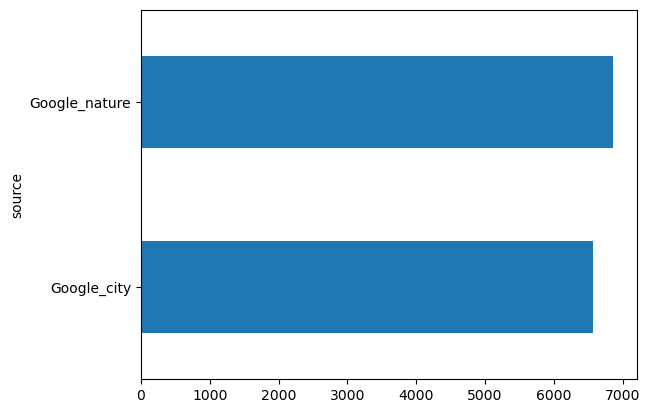

In [4]:
# sorting out the sources of data files
nature_df = pd.DataFrame({'file': nature_file_list, 'source': 'Google_nature', 'category': 0})
city_df = pd.DataFrame({'file': city_file_list, 'source': 'Google_city', 'category': 1})
df_all = pd.concat([nature_df, city_df], ignore_index=True)

source_count = df_all.groupby(['source'])['file'].count()
ax = source_count.plot.barh()
plt.show()

In [5]:
# make the weights as the inverse of the number of files per source
df_all['weight'] = df_all['source'].apply(lambda s: 1/source_count.loc[s])

if no_weight:
    # just set all the weights to 1
    df_all['weight'] = 1

In [6]:
df_all

,file,source,category,weight
0,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1
1,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1
2,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1
3,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1
4,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1
...,...,...,...,...
13419,../data/interim/GoogleAudioSet_unbalanced_list...,Google_city,1,1
13420,../data/interim/GoogleAudioSet_unbalanced_list...,Google_city,1,1
13421,../data/interim/GoogleAudioSet_unbalanced_list...,Google_city,1,1
13422,../data/interim/GoogleAudioSet_unbalanced_list...,Google_city,1,1


In [7]:
from sklearn.model_selection import StratifiedKFold

# Split the data into folds using KFold
skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=23)
for fold, (train_idx, val_idx) in enumerate(skf.split(X=df_all, y=df_all['source'])):
    # Assign the fold number to each row in the DataFrame
    df_all.loc[val_idx, 'fold'] = fold
    
df_all['fold'] = df_all['fold'].astype('int')


In [8]:
nature_eval_pklfile_list = glob.glob('../data/interim/GoogleAudioSet_eval_list/Outside, rural or natural/*.pkl')
city_eval_pklfile_list = glob.glob('../data/interim/GoogleAudioSet_eval_list/Outside, urban or manmade/*.pkl')
df_eval_nature = pd.read_csv('../data/interim/GoogleAudioSet_eval_list/nature_no_music.csv', index_col=0)
df_eval_city = pd.read_csv('../data/interim/GoogleAudioSet_eval_list/city_no_music.csv', index_col=0)
nature_noMusic_eval_file_list = '../data/interim/GoogleAudioSet_eval_list/Outside, rural or natural/'+df_eval_nature['filename']+'.pkl'
city_noMusic_eval_file_list = '../data/interim/GoogleAudioSet_eval_list/Outside, urban or manmade/'+df_eval_city['filename']+'.pkl'

nature_eval_file_list = intersection(nature_eval_pklfile_list, nature_noMusic_eval_file_list)
city_eval_file_list = intersection(city_eval_pklfile_list, city_noMusic_eval_file_list)

In [9]:
nature_eval_df = pd.DataFrame({'file': nature_eval_file_list, 'source': 'Google_nature', 'category': 0, 'weight': 1, 'fold': 9})
city_eval_df = pd.DataFrame({'file': city_eval_file_list, 'source': 'Google_city', 'category': 1, 'weight': 1, 'fold': 9})
df_all = pd.concat([df_all, nature_eval_df, city_eval_df], ignore_index=True)

In [10]:
df_all

,file,source,category,weight,fold
0,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1,8
1,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1,4
2,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1,5
3,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1,6
4,../data/interim/GoogleAudioSet_unbalanced_list...,Google_nature,0,1,3
...,...,...,...,...,...
13662,../data/interim/GoogleAudioSet_eval_list/Outsi...,Google_city,1,1,9
13663,../data/interim/GoogleAudioSet_eval_list/Outsi...,Google_city,1,1,9
13664,../data/interim/GoogleAudioSet_eval_list/Outsi...,Google_city,1,1,9
13665,../data/interim/GoogleAudioSet_eval_list/Outsi...,Google_city,1,1,9


In [11]:
# need to shuffle the rows before deep learning
df_all = df_all.sample(frac=1, random_state=23).reset_index(drop=True) 
df_all.to_csv(save_file_name)